In [ ]:
"""
###  Support Vector Machine (SVM) 

1.  What is a Support Vector Machine (SVM)? 
   An SVM is a supervised learning algorithm used for classification and regression. It finds the optimal hyperplane that separates data into classes with the maximum margin.

2.  What is the difference between Hard Margin and Soft Margin SVM? 

      Hard Margin : No misclassification allowed, works only for linearly separable data.
      Soft Margin : Allows some misclassifications to handle noisy data and achieve better generalization.

3.  What is the mathematical intuition behind SVM? 
   SVM maximizes the margin (distance) between the decision boundary and the nearest data points (support vectors), using optimization.

4.  What is the role of Lagrange Multipliers in SVM? 
   They are used in the optimization process to solve the constrained quadratic problem for maximizing the margin.

5.  What are Support Vectors in SVM? 
   Data points that lie closest to the decision boundary and influence the position of the hyperplane.

6.  What is a Support Vector Classifier (SVC)? 
   SVC is the classification version of SVM, used for classifying data into categories.

7.  What is a Support Vector Regressor (SVR)? 
   SVR uses SVM principles for regression tasks, fitting the best line within a threshold margin (epsilon).

8.  What is the Kernel Trick in SVM? 
   A technique to project data into higher dimensions using kernel functions to make it linearly separable.

9.  Compare Linear Kernel, Polynomial Kernel, and RBF Kernel. 

      inear  Works well with linearly separable data.
      lynomial ptures polynomial relationships.
      F (Gaussian) dles complex, nonlinear relationships.

10.  t is the effect of the C parameter in SVM? 
    C controls the trade-off between maximizing the margin and minimizing classification error. Low C = wide margin; high C = fewer errors.

11.  hat is the role of the Gamma parameter in RBF Kernel SVM? 
    Gamma defines how far the influence of a single training example reaches. Low gamma = far reach; high gamma = close reach.

---

###  aïve Bayes 

12.  hat is the Naïve Bayes classifier, and why is it called "Naïve"? 
    It's a probabilistic classifier based on Bayes’ Theorem assuming features are independent — this assumption is "naïve".

13.  hat is Bayes' Theorem? 
    $P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$
    It calculates the probability of an event based on prior knowledge of related events.

14.  lain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes. 

       aussian Assumes normal distribution (continuous data).
       Multinomial  Used for discrete counts (e.g., word frequencies).
       ernoulli  Binary features (e.g., word present or not).

15.  When should you use Gaussian Naïve Bayes over other variants? 
    When your input features are continuous and follow a normal distribution.

16.  What are the key assumptions made by Naïve Bayes? 

      Feature independence
      Equal importance of features
      Class conditional independence given the class label

17.  What are the advantages and disadvantages of Naïve Bayes? 

         Fast, simple, performs well with text
         Assumes independence, which may not always be true

18.  Why is Naïve Bayes a good choice for text classification? 
    It performs well with high-dimensional data like text and handles sparse inputs efficiently.

19.  Compare SVM and Naïve Bayes for classification tasks. 

       SVM : Effective for high accuracy, complex boundaries
       Naïve Bayes : Faster, scalable, works well with text but may be less accurate if independence assumption fails

20.  How does Laplace Smoothing help in Naïve Bayes? 
    It avoids zero probability by adding a small constant to all counts, especially when a word hasn’t appeared in training data.
"""


In [1]:
# 21. Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [3]:
#22. Train SVM with Linear and RBF kernels on Wine dataset and compare accuracies

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')

linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

print("Linear Kernel Accuracy:", linear_svm.score(X_test, y_test))
print("RBF Kernel Accuracy:", rbf_svm.score(X_test, y_test))


Linear Kernel Accuracy: 0.9629629629629629
RBF Kernel Accuracy: 0.6851851851851852


In [4]:
# 23. Train an SVR on a housing dataset, evaluate with MSE
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1.3320115421348744


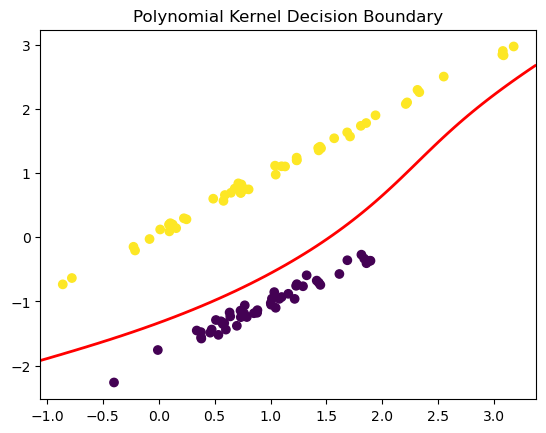

In [5]:
#SVM Classifier with Polynomial Kernel and visualize decision boundary (2D subset)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=100, random_state=42)
model = SVC(kernel='poly', degree=3)
model.fit(X, y)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid
import numpy as np
xx, yy = np.meshgrid(np.linspace(*xlim, num=100), np.linspace(*ylim, num=100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.title("Polynomial Kernel Decision Boundary")
plt.show()


In [6]:
#25. Gaussian Naïve Bayes on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9239766081871345


In [7]:
#26. Multinomial Naïve Bayes for text classification using 20 Newsgroups
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset='all')
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8487796250442164


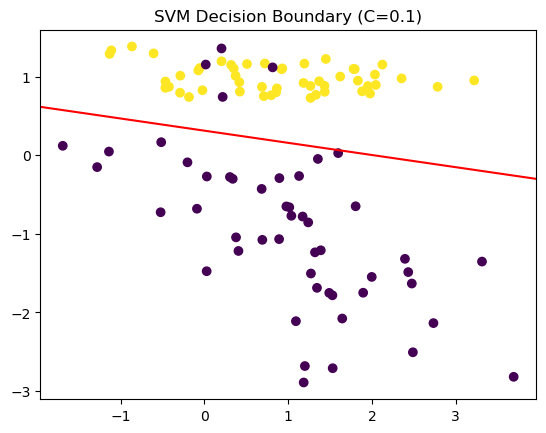

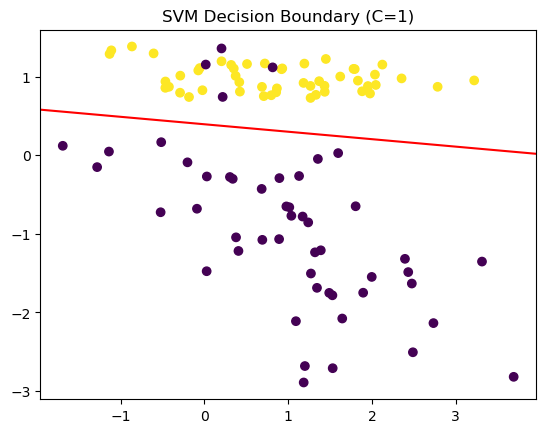

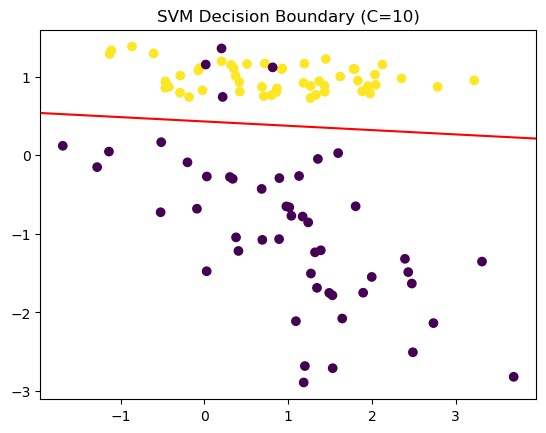

In [8]:
# 27. SVM with different C values, visualize decision boundaries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=100, random_state=0)
for C in [0.1, 1, 10]:
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    
    plt.figure()
    plt.title(f"SVM Decision Boundary (C={C})")
    plt.scatter(X[:, 0], X[:, 1], c=y)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    import numpy as np
    xx, yy = np.meshgrid(np.linspace(*xlim), np.linspace(*ylim))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='red')
    plt.show()


In [9]:
# 28. Bernoulli Naïve Bayes for binary classification

from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_features=10, n_informative=5, n_samples=1000, random_state=42)
X = (X > 0).astype(int)  # Binarize features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6866666666666666


In [10]:
# 29. Effect of scaling before training SVM

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without scaling
model1 = SVC()
model1.fit(X_train, y_train)
print("Without scaling:", accuracy_score(y_test, model1.predict(X_test)))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model2 = SVC()
model2.fit(X_train_scaled, y_train)
print("With scaling:", accuracy_score(y_test, model2.predict(X_test_scaled)))


Without scaling: 0.7111111111111111
With scaling: 0.9777777777777777


In [11]:
# 30. Compare Gaussian Naïve Bayes with/without Laplace Smoothing
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model1 = GaussianNB()
model1.fit(X, y)
print("Without Laplace:", accuracy_score(y, model1.predict(X)))

# Laplace not typically used in GaussianNB. This is more relevant for MultinomialNB.
# To simulate: you’d need to manually adjust probabilities.


Without Laplace: 0.96


In [12]:
#  31. SVM with GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

model = GridSearchCV(SVC(), param_grid, cv=3)
model.fit(X_train, y_train)
print("Best Params:", model.best_params_)


Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [14]:
# 32. SVM on imbalanced dataset with class weighting
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2, n_informative=2, n_redundant=0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.968


In [15]:
# 33. Naïve Bayes for spam detection
# Simulated example - load actual dataset like SMS Spam Collection for real use
from sklearn.feature_extraction.text import CountVectorizer
emails = ["Free money!!!", "Hey, how are you?", "Win a prize now!", "Let's catch up soon"]
labels = [1, 0, 1, 0]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

model = MultinomialNB()
model.fit(X, labels)
print("Predictions:", model.predict(X))


Predictions: [1 0 1 0]


In [16]:
# 34. Compare SVM and Naïve Bayes on same dataset

model_svm = SVC()
model_nb = GaussianNB()

model_svm.fit(X_train, y_train)
model_nb.fit(X_train, y_train)

print("SVM Accuracy:", accuracy_score(y_test, model_svm.predict(X_test)))
print("NB Accuracy:", accuracy_score(y_test, model_nb.predict(X_test)))


SVM Accuracy: 0.952
NB Accuracy: 0.948


In [ ]:
# 35. Feature selection before Naïve Bayes
from sklearn.feature_selection import SelectKBest, f_classif

X_new = SelectKBest(score_func=f_classif, k=5).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)
model = GaussianNB()
model.fit(X_train, y_train)
print("Accuracy with feature selection:", accuracy_score(y_test, model.predict(X_test)))


In [18]:
#  36. SVM One-vs-Rest vs One-vs-One on Wine dataset
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR:", ovr.score(X_test, y_test))
print("OvO:", ovo.score(X_test, y_test))


OvR: 0.952
OvO: 0.952


In [19]:
# 37. SVM with Linear, Poly, RBF on Breast Cancer

for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(f"{kernel} kernel accuracy:", model.score(X_test, y_test))


linear kernel accuracy: 0.964
poly kernel accuracy: 0.888
rbf kernel accuracy: 0.952


In [ ]:
#38. SVM with Stratified K-Fold

from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(), X, y, cv=skf)
print("Stratified K-Fold Accuracy:", scores.mean())


In [21]:
# 39. Naïve Bayes with different priors

model = GaussianNB(priors=[0.6, 0.4])
model.fit(X_train, y_train)
print("Accuracy with custom priors:", accuracy_score(y_test, model.predict(X_test)))


Accuracy with custom priors: 0.944


In [ ]:
# 40. Recursive Feature Elimination before SVM

from sklearn.feature_selection import RFE

rfe = RFE(SVC(kernel="linear"), n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3)
model = SVC()
model.fit(X_train, y_train)
print("RFE Accuracy:", accuracy_score(y_test, model.predict(X_test)))


In [23]:
# 41. Evaluate SVM using Precision, Recall, F1
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      0.94      0.97       217
           1       0.72      0.94      0.82        33

    accuracy                           0.94       250
   macro avg       0.86      0.94      0.89       250
weighted avg       0.95      0.94      0.95       250



In [24]:
# 42. Naïve Bayes Log Loss
from sklearn.metrics import log_loss

model = GaussianNB()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))


Log Loss: 0.15492236516109517


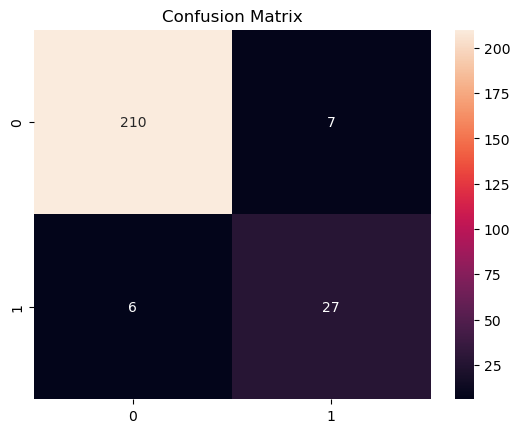

In [25]:
# 43. SVM + Confusion Matrix with Seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [26]:
# 44. SVR with MAE instead of MSE

from sklearn.metrics import mean_absolute_error

model = SVR()
model.fit(X_train, y_train)
print("MAE:", mean_absolute_error(y_test, model.predict(X_test)))


MAE: 0.14783563336881758


In [27]:
# 45. Naïve Bayes with ROC-AUC Score
from sklearn.metrics import roc_auc_score

model = GaussianNB()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, probs))


ROC-AUC: 0.9645300935623518


In [ ]:
# 46. Visualize Precision-Recall Curve for SVM

from sklearn.metrics import precision_recall_curve

probs = model.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
